<a href="https://colab.research.google.com/github/ZeleOeO/Artificial-Intelligence-Projects/blob/main/Economic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I didn't test this one out
Cause I didn't really know what I was working with (I was too lazy to look at it)
Maybe I'll revisit(Probably not)

In [1]:
import pandas as pd

url = "https://github.com/codebasics/nlp-tutorials/blob/main/12_tf_idf/Ecommerce_data.csv?raw=true"
df = pd.read_csv(url)
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [2]:
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [3]:
df["label_num"] = df.label.map({
    "Household":0,
    "Books":1,
    "Electronics":2,
    "Clothing & Accessories":3
})

df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text)

  filtered_tokens=[]

  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  
  return " ".join(filtered_tokens)

In [5]:
df["preprocessed_text"] = df["Text"].apply(preprocess)

In [6]:
df.head()

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( 
    df.preprocessed_text,
    df.label_num,
    test_size=0.2,
    random_state=2023,
    stratify = df.label_num
)

In [8]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


model = RandomForestClassifier()
clf = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("Random Forest", RandomForestClassifier())
])

clf.fit(x_train, y_train )
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



Text(95.72222222222221, 0.5, 'Truth')

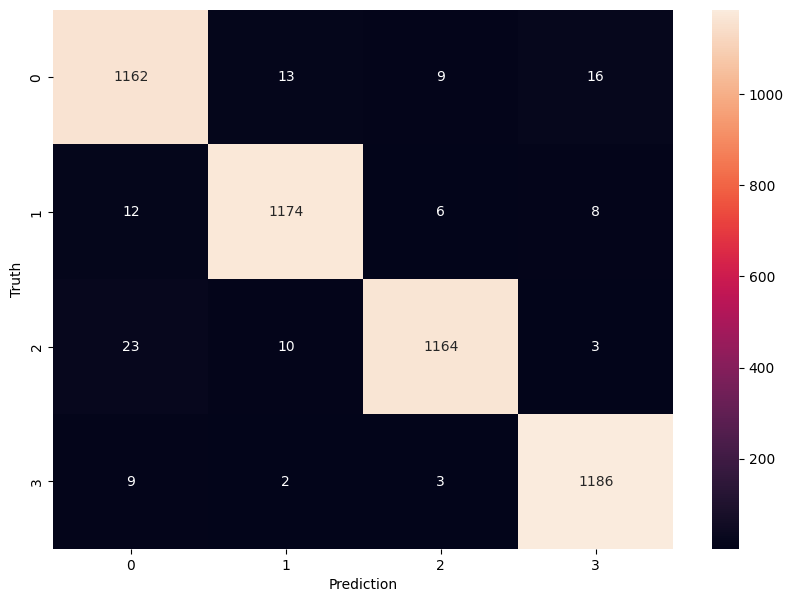

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')